In [1]:
%gui qt
%matplotlib inline

In [2]:
from spyr import *

In [3]:
# Test make_steer_bands, build_steer_bands and recon_steer_bands
im = misc.imread('/Users/chrysapapadaniil/Desktop/einstein.png')
im[0][0]=0      #some changes to make the image look like the one in matlab
im=np.roll(im, -1)

numorientations = 4
bandwidth = 1
dims=im.shape
numlevels = est_maxlevel(dims,bandwidth)
freq_resps= make_steer_frs(dims, numlevels, numorientations, bandwidth)

matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


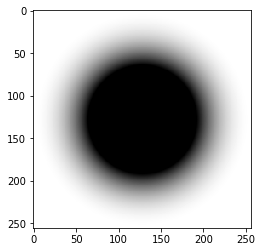

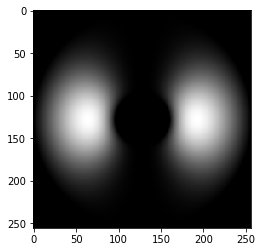

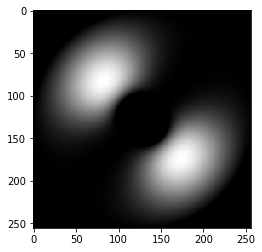

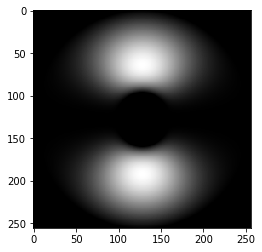

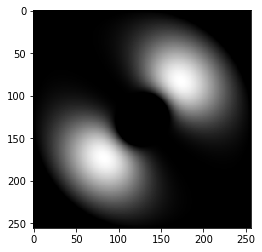

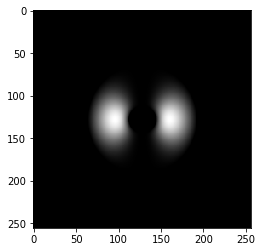

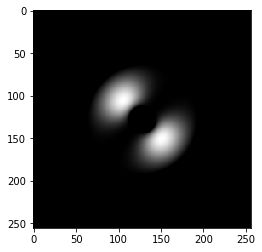

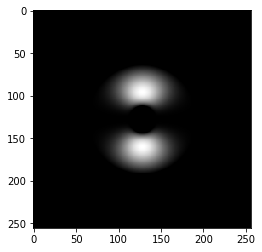

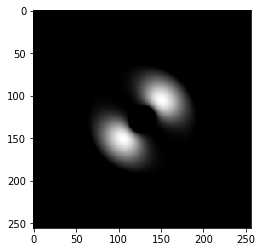

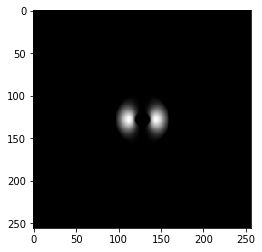

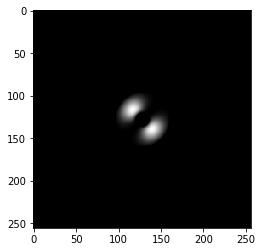

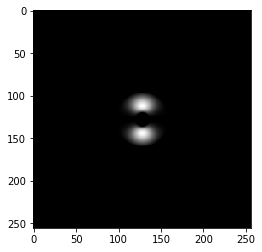

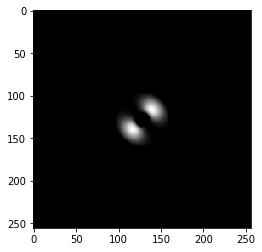

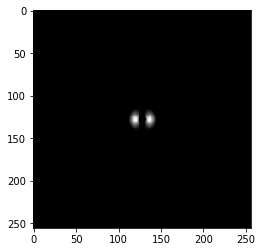

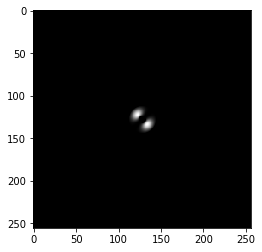

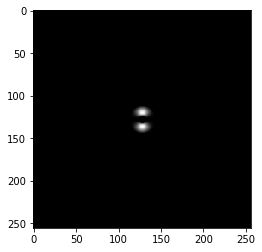

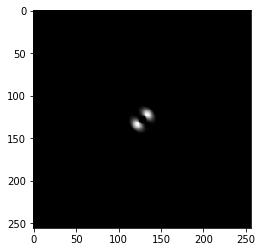

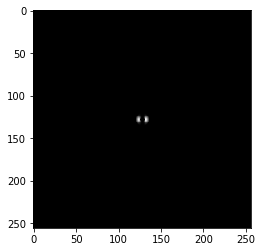

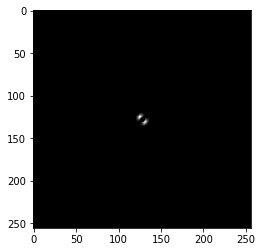

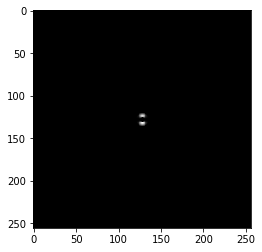

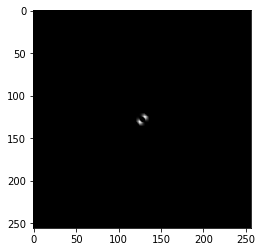

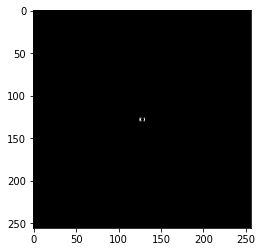

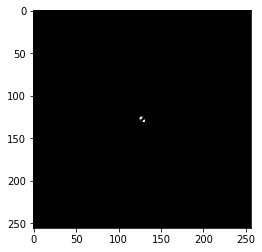

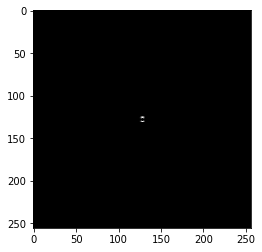

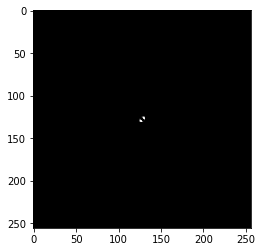

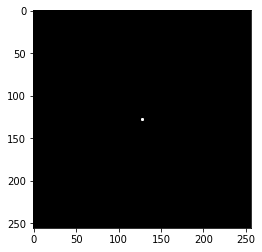

In [4]:
view_abs_spyr_images(freq_resps,numlevels,numorientations)

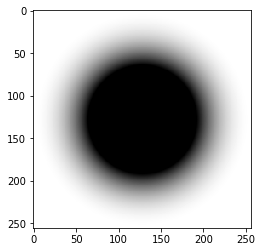

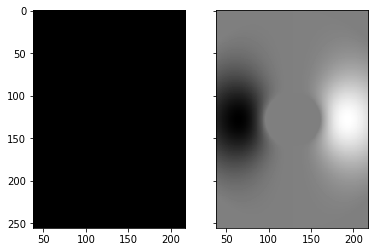

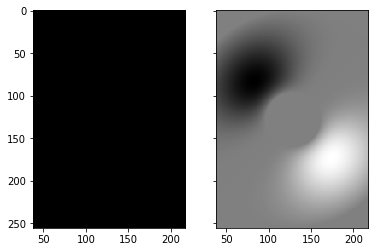

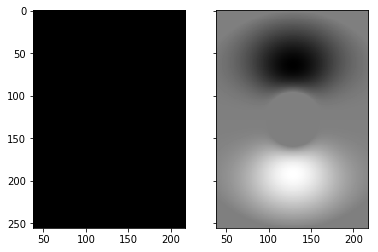

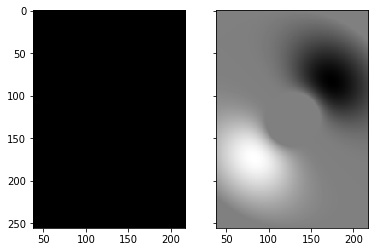

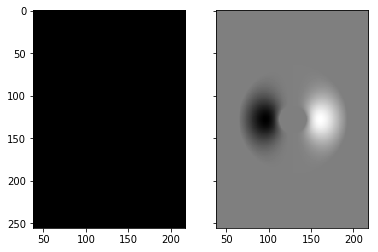

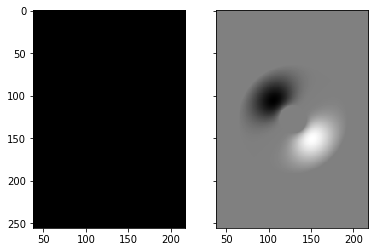

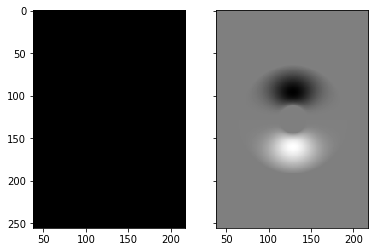

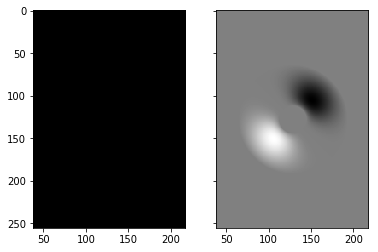

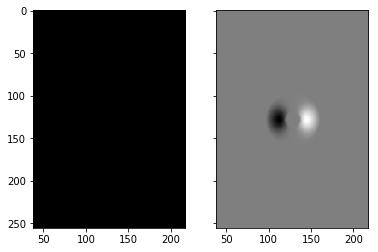

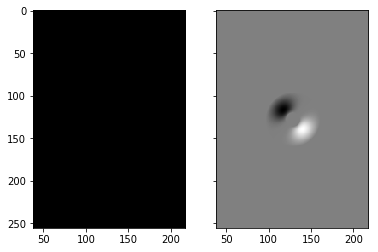

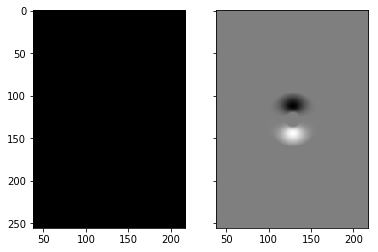

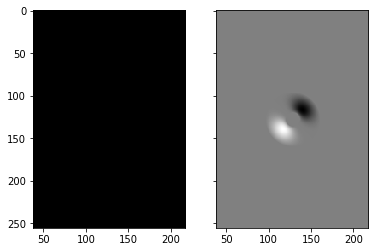

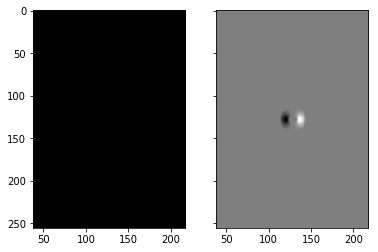

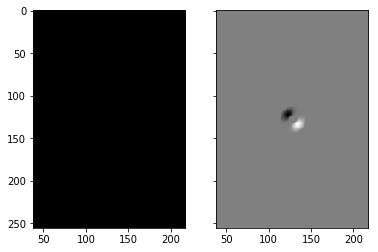

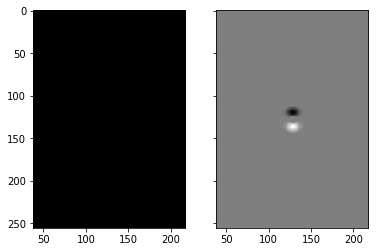

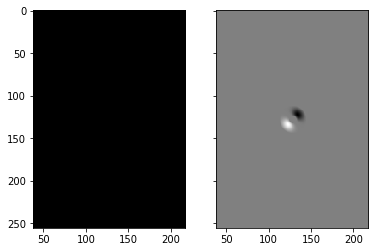

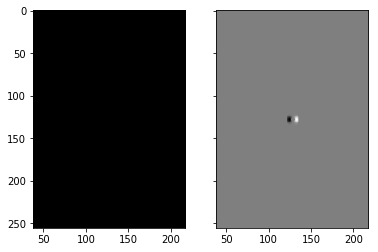

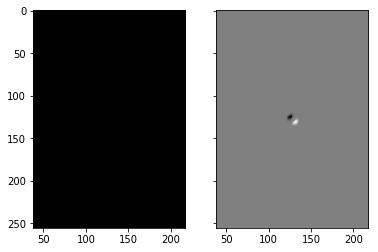

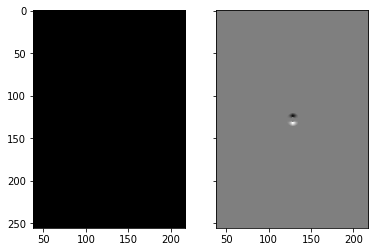

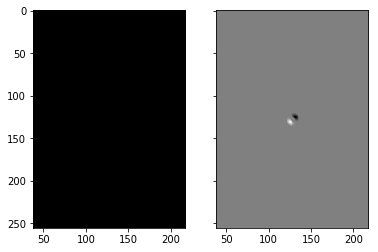

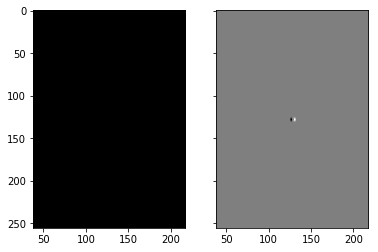

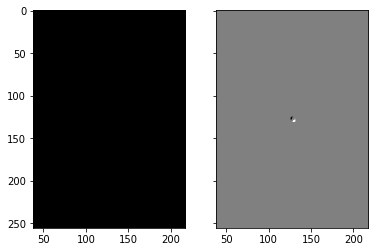

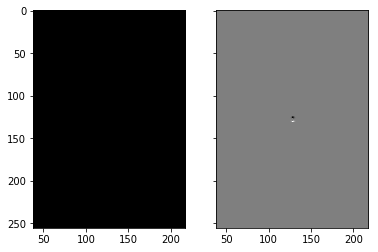

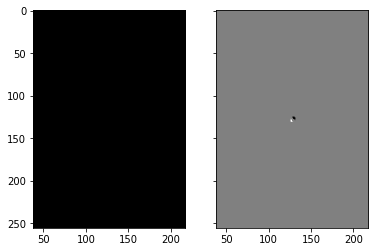

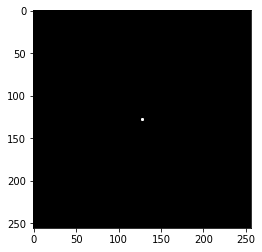

In [6]:
view_real_imag_spyr_images(freq_resps, numlevels, numorientations)

In [7]:
pyr = build_steer_bands(im, freq_resps, numlevels, numorientations)

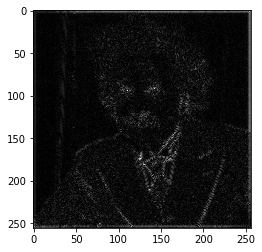

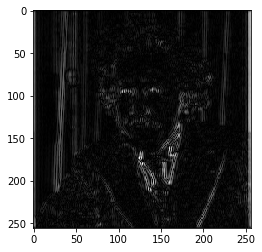

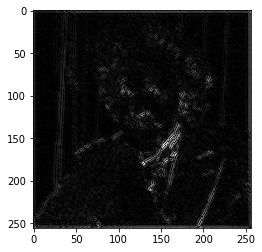

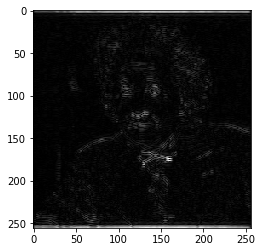

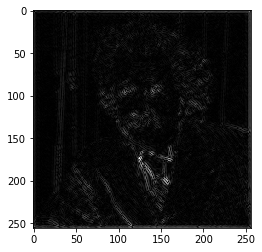

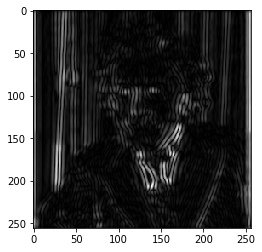

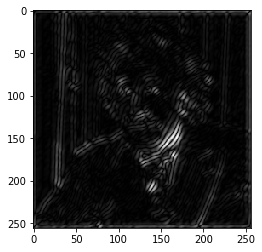

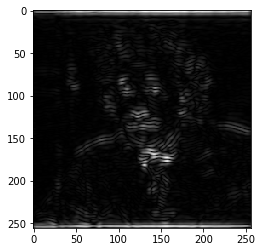

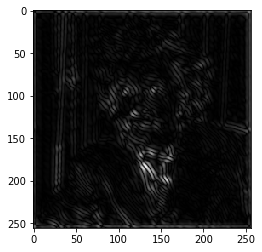

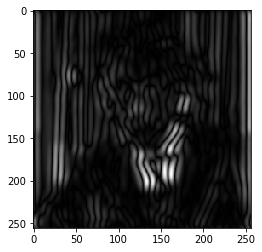

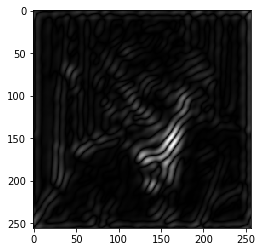

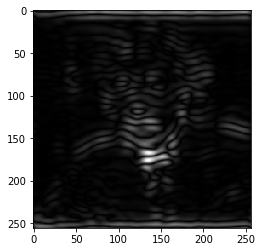

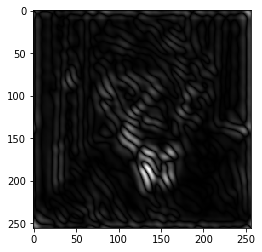

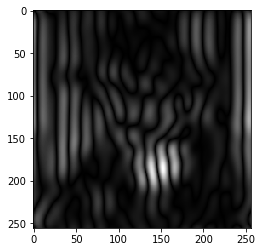

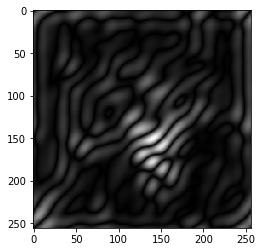

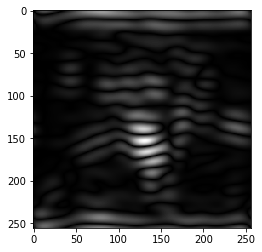

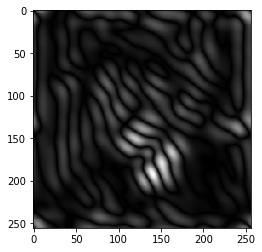

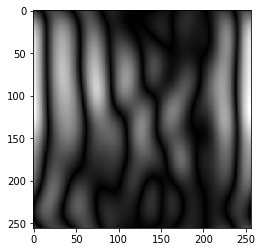

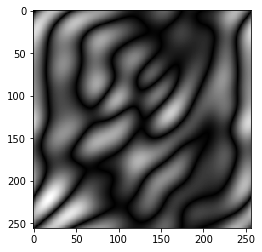

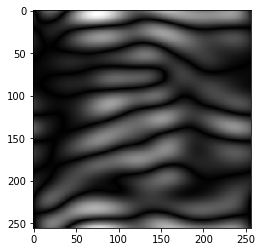

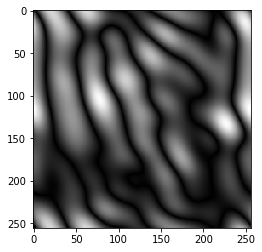

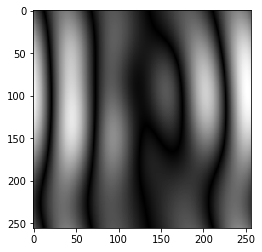

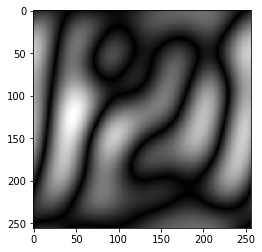

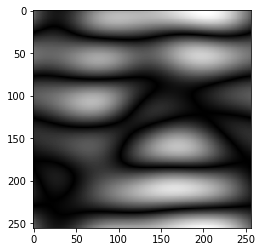

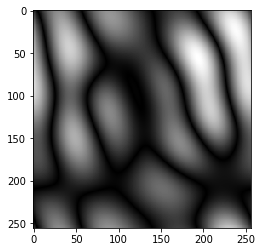

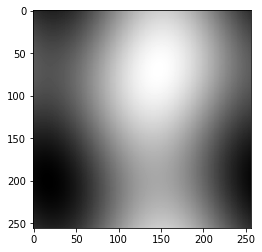

In [8]:
view_abs_spyr_images(pyr, numlevels,numorientations)

2.8637576789467116e-28

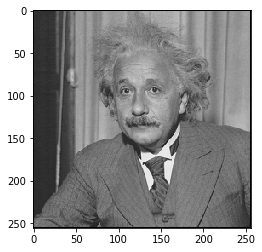

In [9]:
recon = recon_steer_bands(pyr, freq_resps, numlevels, numorientations)
plt.imshow(recon)
mse = mean_squared_error(im, recon)
mse

In [ ]:
# Check Tiling
hi_tiles = abs(np.power(freq_resps[0],2))
lo_tiles = abs(np.power(freq_resps[2],2))
band_tiles = freq_resps[1]
sum_tile = np.zeros(hi_tiles.shape)
for level in range(numlevels):
    for orientation in range(numorientations):
        sum_tile = sum_tile + abs(np.power(band_tiles[level][orientation], 2))
        
tiles = hi_tiles + sum_tile + lo_tiles
print(np.amax(tiles))
print(np.amin(tiles))

In [ ]:
#Check mean values
pyr_band = pyr[1]
print(np.mean(pyr[0]))
for level in range(numlevels):
    for orientation in range(numorientations):
        print(np.mean(pyr_band[level][orientation]))
print(np.mean(pyr[2]))

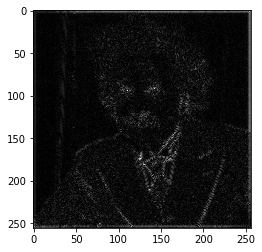

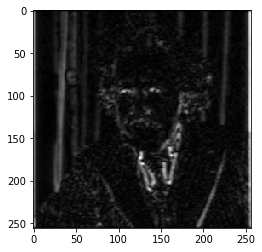

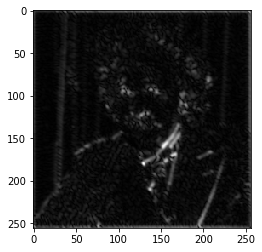

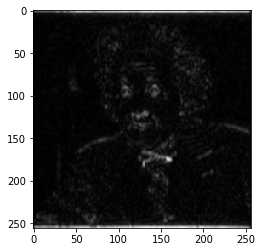

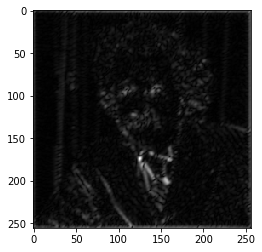

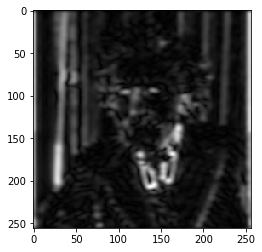

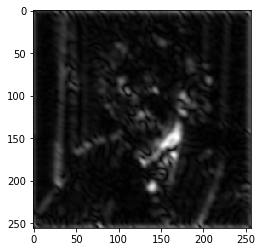

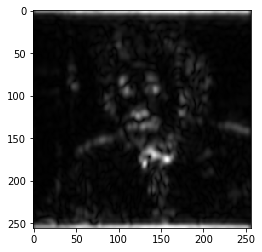

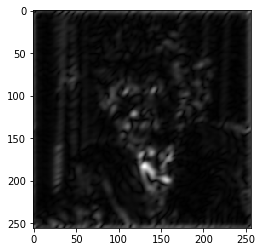

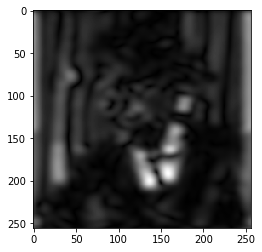

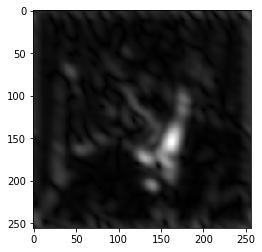

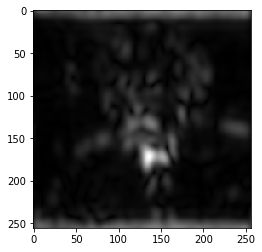

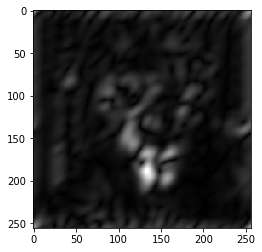

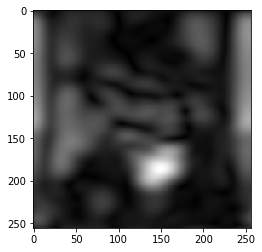

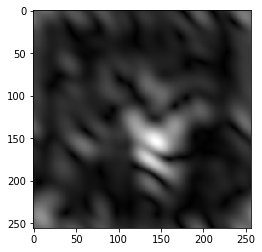

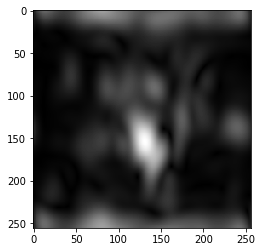

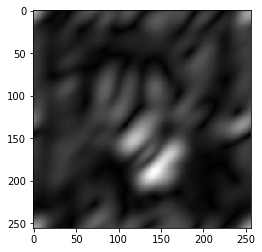

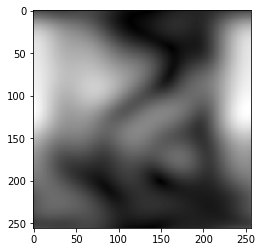

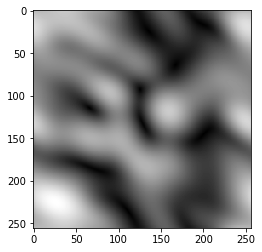

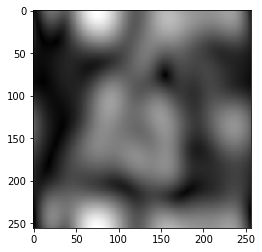

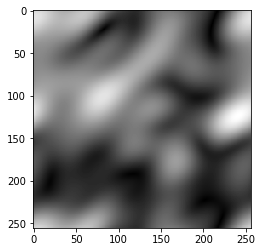

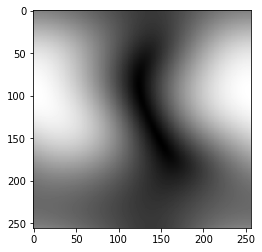

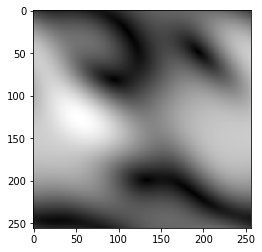

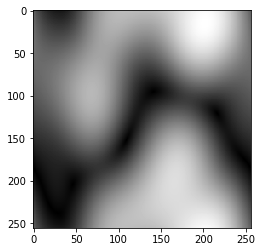

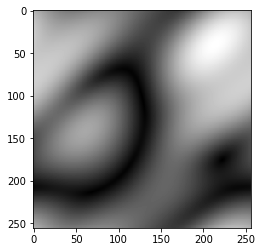

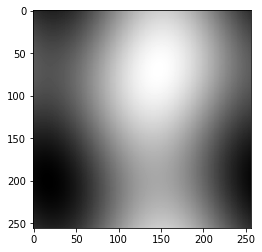

In [10]:
#Test Quadrature pyramids
freq_resps_imag=make_quad_frs_imag(dims,numlevels,numorientations,bandwidth)
freq_resps_real=make_quad_frs_real(dims,numlevels,numorientations,bandwidth)
pyr_quad = build_quad_bands(im, freq_resps_imag, freq_resps_real, numlevels, numorientations)
view_abs_spyr_images(pyr_quad, numlevels, numorientations)

9.9945210017602299e-28

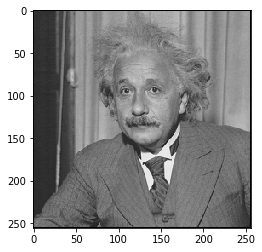

In [11]:
recon_quad = recon_steer_bands(pyr_quad.real, freq_resps_real, numlevels, numorientations)
plt.imshow(recon_quad)
plt.gray
mse_quad = mean_squared_error(im, recon_quad)
mse_quad

In [12]:
# Check Tiling
hi_tiles = abs(np.power(freq_resps_real[0],2))
lo_tiles = abs(np.power(freq_resps_real[2],2))
band_tiles_real = freq_resps_real[1]
band_tiles_imag = freq_resps_imag[1]

sum_tile_real = np.zeros(hi_tiles.shape)
sum_tile_imag = np.zeros(hi_tiles.shape)
for level in range(numlevels):
    for orientation in range(numorientations):
        sum_tile_real = sum_tile_real + np.multiply(0.5, abs(np.power(band_tiles_real[level][orientation], 2)))
        sum_tile_imag = sum_tile_imag + np.multiply(0.5, abs(np.power(band_tiles_imag[level][orientation], 2)))

tiles = hi_tiles + sum_tile_real + sum_tile_imag + lo_tiles
print(np.amax(tiles))
print(np.amin(tiles))

1.0
1.0
